# **BUSINESS CASE 3: Recheio Rocommendation System**  


## 🎓 Master’s Program in Data Science & Advanced Analytics 
**Nova IMS** | March 2025   
**Course:** Business Cases with Data Science

## 👥 Team **Group A**  
- **Alice Viegas** | 20240572  
- **Bernardo Faria** | 20240579  
- **Dinis Pinto** | 20240612  
- **Daan van Holten** | 20240681
- **Philippe Dutranoit** | 20240518

## 📊 Project Overview  
This notebook utilizes the following datasets:  
- Case3_Recheio_2025 (1).xlsx <br>
- The goal of the project is to design a recomendation system so that the company can propose better products to existing costumers.

## 📊 Goal of the notebook

In this notebook we will cluster the clients with transactions as we consider that constumer without transaction are a clustter of them selfs <br>

# Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data_clients = pd.read_csv('../Data/clients_with_transactions.csv')
data_products = pd.read_excel('../Data/Case3_Recheio_2025 (1).xlsx', sheet_name='2. PRODUCTS', usecols='B:D', skiprows=1)
data_transactions = pd.read_excel('../Data/Case3_Recheio_2025 (1).xlsx', sheet_name='3. TRANSACTIONS', usecols='B:D', skiprows=1)

In [43]:
# we drop the columns id client type as we are clustering the clients again
data_clients.drop(columns=['ID Client Type'], inplace=True)
data_clients.head()

,Client ID,ZIP Code
0,210100005,4100
1,210100012,4050
2,210100033,4300
3,210100051,4465
4,210100096,4100


In [44]:
data_products.head()


,ID Product,Product Description,ID Product Category
0,224780,FARINHA ESPIGA AMIDO MILHO LUS.2KG,FARINHAS
1,276806,LARANJA CAL7 (67/76) RCH,FRUTAS FRESCAS
2,276809,LIMAO CAL 3/4 RCH,FRUTAS FRESCAS
3,277674,COGUMELO BRANCO MÉDIO RCH,LEGUMES FRESCOS
4,277917,TOMATE BB 67/82 1CAM RCH,LEGUMES FRESCOS


In [45]:
unique_categories = data_products['ID Product Category'].unique().tolist()
unique_categories

['FARINHAS',
 'FRUTAS FRESCAS',
 'LEGUMES FRESCOS',
 'HORTÍCOLAS CONSERVAÇÃO',
 'ARROZ',
 'LEITE UHT REGULAR',
 'FRUTAS',
 'VINAGRES',
 'BANHA',
 'BRANDY',
 'ESPECIARIAS',
 'LEITE DE COCO',
 'MOLHOS',
 'MULTIUSOS',
 'CONSERVAS VEGETAIS',
 'AZEITES',
 'BATATA',
 'AFINS DE BACALHAU',
 'OVOS GAIOLA',
 'ÓLEOS',
 'FIAMBRES',
 'AVES / CAÇA / COELHO',
 'OUTROS QUEIJOS',
 'MASSAS',
 'CERVEJAS INTERNACIONAIS',
 'QUEIJO PRATINHO',
 'BOVINO',
 'CEFALÓPODES',
 'SOBREMESAS',
 '4A GAMA',
 'MANTEIGAS',
 'NATAS',
 'OUTROS QUEIJOS ESTRANGEIROS',
 'FRUTOS SECOS',
 'AÇÚCAR',
 'BACON',
 'EDAM',
 'NÃO CARBONATADOS',
 'WHISKY',
 'APERITIVOS E BATATA FRITA',
 'NÉCTARES',
 'CAFÉS E MISTURAS',
 'GELATINAS',
 'BOLACHAS',
 'CHÁS E INFUSÕES',
 'IOGURTES',
 'SUINO',
 'ÁGUAS COM GÁS',
 'ÁGUAS LISAS',
 'ALHEIRAS',
 'QUEIJOS PRATO',
 'CARBONATADOS',
 'PRODUTOS DE PADARIA',
 'PRESUNTOS',
 'DETERGENTE LOIÇA',
 'VINHOS TINTOS',
 'VINHOS BRANCOS',
 'VEGETAIS DE FOLHA E CRUCÍFEROS',
 'PEIXE CONG EMBALADO',
 'FARDAMENTO',


In [52]:

category_groups = {
    'Fresh Produce': [
        'FRUTAS FRESCAS', 'LEGUMES FRESCOS', 'FRUTAS', 'HORTÍCOLAS CONSERVAÇÃO', '4A GAMA',
        'VEGETAIS DE FOLHA E CRUCÍFEROS', 'OUTROS VEGETAIS', 'ESPINAFRES / GRELOS/ ESPARREGADO',
        'CEBOLA / ALHO E ERVAS AROMÁTICAS', 'VEGETAIS DE RAÍZ E BULBOS', 'ERVILHA'
    ],
    'Meat and Poultry': [
        'BOVINO', 'SUINO', 'OVINO / CAPRINO', 'AVES / CAÇA / COELHO', 'AVES / COELHO',
        'PREPARADOS CARNE', 'HAMBURGUERES / ALMONDEGAS / ESPETADAS', 'CHOURIÇOS', 'SALSICHAS',
        'SALSICHAS FRESCAS', 'LINGUIÇA', 'BACON', 'PRESUNTOS', 'PAIOS', 'FARINHEIRAS',
        'MORTADELA', 'CHOURIÇÃO', 'OUTROS ENCHIDOS', 'OUTROS FUMADOS', 'ALHEIRAS'
    ],
    'Fish and Seafood': [
        'PEIXE CONG EMBALADO', 'PEIXE CONG HIGIENIZADO', 'PEIXE CONG GRANEL',
        'PEIXES INTEIROS / CORTADOS', 'PESCADO AQUICULTURA', 'PESCADO SELVAGEM',
        'MARISCO', 'MARISCO FRESCO', 'MARISCO COZIDO', 'BACALHAU', 'BACALHAU INTEIRO',
        'CAMARÃO', 'LAGOSTA, SAPATEIRA E OUTROS', 'BIVALVES', 'CEFALÓPODES',
        'PREPARADOS PEIXE', 'PREPARADOS PEIXE E MARISCO', 'PESCADO ESPECIALIDADES', 'ESPECIALIDADES PEIXE'
    ],
    'Dairy and Eggs': [
        'LEITE UHT REGULAR', 'LEITE UHT ESPECIAL', 'LEITE UHT AROMATIZADO', 'LEITE EM PÓ',
        'IOGURTES', 'MANTEIGAS', 'NATAS', 'CREMES VEGETAIS', 'CREMES PARA BARRAR',
        'QUEIJO PRATINHO', 'OUTROS QUEIJOS', 'OUTROS QUEIJOS ESTRANGEIROS',
        'QUEIJOS PRATO', 'QUEIJOS PARA BARRAR', 'QUEIJOS FRESCOS', 'QUEIJOS REGIONAIS',
        'MOZZARELLA', 'MOZZARELA', 'EDAM', 'FLAMENGO', 'CHEDDAR', 'EMMENTAL', 'FUNDIDO',
        'OVOS GAIOLA', 'OVOS PROCESSADOS', 'OVOS CODERNIZ'
    ],
    'Pantry Staples': [
        'ARROZ', 'MASSAS', 'FARINHAS', 'LEGUMINOSAS E GRÃOS', 'AÇÚCAR', 'SAL', 'FERMENTO FRESCO',
        'PRODUTOS PARA CULINÁRIA', 'CONDIMENTOS', 'ESPECIARIAS', 'VINAGRES'
    ],
    'Bakery and Pastry': [
        'PRODUTOS DE PADARIA', 'PÃO TAMANHO GRANDE', 'PÃO MINI', 'PÃO TAMANHO INDIVIDUAL',
        'PÃO DE HAMBÚRGUER', 'BOLOS E BISCOITOS', 'BOLOS E SOBREMESAS INDIVIDUAIS',
        'BOLOS E SOBREMESAS FAMILIAR', 'PASTELARIA', 'PADARIA', 'PADARIA E PASTELARIA',
        'OUTROS PÃES E ESPECIALIDADES'
    ],
    'Frozen and Refrigerated Foods': [
        'SOBREMESAS REFRIGERADAS', 'REFEIÇÕES REFRIGERADAS', 'REFEIÇÕES PRONTAS',
        'GELADOS TAKE HOME', 'GELADOS MULTI-PACK', 'GELADOS CATERING', 'MASSAS REFRIGERADAS',
        'PRATO DE CARNE', 'PRATO DE PEIXE', 'PRATO VEGETARIANO', 'SOPAS INSTANTANEAS', 'SOPAS'
    ],
    'Beverages': [
        'SUMOS', 'SUMOS 100 %', 'SUMOS REFRIGERADOS', 'NÉCTARES', 'NÃO CARBONATADOS',
        'CARBONATADOS', 'ÁGUAS LISAS', 'ÁGUAS COM GÁS', 'ENERGÉTICOS', 'ACHOCOLATADOS',
        'CAFÉS E MISTURAS', 'CHÁS E INFUSÕES'
    ],
    'Alcoholic Beverages': [
        'VINHOS TINTOS', 'VINHOS BRANCOS', 'VINHOS ROSÉ', 'VINHO DO PORTO',
        'VINHO MADEIRA', 'VINHO ABAFADO', 'TINTO | BRANCO', 'ESPUMANTES NACIONAIS',
        'ESPUMANTES ESTRANGEIROS', 'FRISANTES TINTOS', 'FRISANTES BRANCOS', 'FRISANTES ROSÉ',
        'SANGRIAS BRANCAS', 'SANGRIAS TINTAS', 'JEROPIGA', 'BRANDY', 'WHISKY', 'VODKA',
        'RUM', 'GINS', 'COGNAC', 'LICORES', 'AGUARDENTE', 'ABSINTO', 'SUCEDÂNIO DE CAVIAR'
    ],
    'Snacks and Confectionery': [
        'APERITIVOS', 'APERITIVOS E BATATA FRITA', 'SALGADOS / SNACKS E ENTRADAS',
        'REBUÇADOS GOMAS E PASTILHAS', 'CHOCOLATE', 'MEL E DOCES', 'DOCES E CREMES PARA BARRAR',
        'TORTITAS'
    ],
    'Canned and Preserved': [
        'CONSERVAS VEGETAIS', 'CONSERVAS ATUM', 'CONSERVAÇÃO DE ALIMENTOS',
        'CONSERVAS MAR ESPECIALIDADES', 'FRUTAS EM CONSERVA'
    ],
    'Baby and Health': [
        'ALIMENTOS INFANTIS', 'HIGIENE BEBÉ', 'PRODUTOS DE SAÚDE'
    ],
    'Cleaning and Household': [
        'DETERGENTE LOIÇA', 'DETERGENTES ROUPA', 'AMACIADORES ROUPA', 'ADITIVOS ROUPA',
        'LIXÍVIAS TRADICIONAIS', 'LIXÍVIAS PERFUMADAS', 'LIXÍVIAS ROUPA', 'SECANTES ABRILHANTADORES LOIÇA',
        'PRODUTOS PARA O CHÃO', 'OUTROS PRODUTOS LIMPEZA', 'LIMPA VIDROS', 'INSECTICIDAS'
    ],
    'Paper and Disposables': [
        'PAPEL HIGIÉNICO', 'TOALHAS DE MÃO', 'GUARDANAPOS FOLHA DUPLA', 'GUARDANAPOS FOLHA TRIPLA',
        'GUARDANAPOS FOLHA SIMPLES', 'TOALHAS DE MESA', 'LENÇOS DE PAPEL', 'TOALHETES',
        'DESCARTÁVEIS PAPEL', 'DESCARTÁVEIS MADEIRA', 'DESCARTÁVEIS PAPEL E CARTÃO',
        'DESCARTÁVEIS ALUMÍNIO', 'DESCARTÁVEIS PLÁSTICO'
    ],
}
data_products['category_grouped'] = data_products['ID Product Category'].apply(
    lambda x: next((group for group, cats in category_groups.items() if x in cats), 'Others')
)

<Axes: xlabel='category_grouped'>

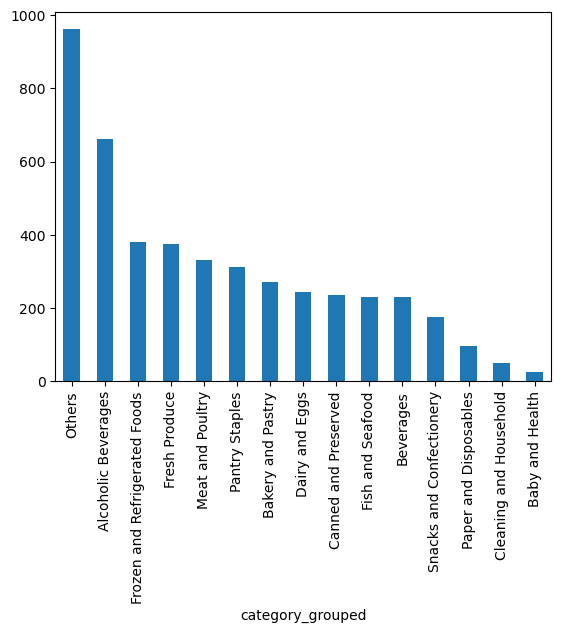

In [53]:
data_products['category_grouped'].value_counts().plot(kind='bar')

In [48]:
print(data_products[data_products['category_grouped'] == 'Others'])

      ID Product                       Product Description  \
0         224780        FARINHA ESPIGA AMIDO MILHO LUS.2KG   
9         521206             ARROZ CAROLINO MASTERCHEF 1KG   
13        667371          VINAGRE MCHEF BALSAMICO PET  2LT   
14        721718                  BANHA MCHEF BALDE 4,75KG   
15        724038                  BEB ESPIRITUOSA 1920 1LT   
...          ...                                       ...   
4574      974777              * FOLHADO DE PATO C COG INOX   
4575      912933  ESP. QTA DE LEMOS GERALDINE BCO2019 75CL   
4576      979174       CARANGUEJO-REAL PERNAS COZIDO AV KG   
4577      865348         V.R.MINHO CASAL GARCIA SWEET 75CL   
4580      975316         POLVO FRIBO T7 FLÔR DE 500/800 KG   

              ID Product Category category_grouped  
0                        FARINHAS           Others  
9                           ARROZ           Others  
13                       VINAGRES           Others  
14                          BANHA          

In [6]:
merged = data_transactions.merge(data_products, on='ID Product', how='left')

# Merge with client info (optional, for enriching with ZIP Code or Client Type)
merged = merged.merge(data_clients, on='Client ID', how='left')

In [7]:
merged

,Date,Client ID,ID Product,Product Description,ID Product Category,ZIP Code,ID Client Type
0,2022-01-02,210100281,224780,FARINHA ESPIGA AMIDO MILHO LUS.2KG,FARINHAS,4400,Café/Pastelaria
1,2022-01-02,210100281,276806,LARANJA CAL7 (67/76) RCH,FRUTAS FRESCAS,4400,Café/Pastelaria
2,2022-01-02,210100281,276809,LIMAO CAL 3/4 RCH,FRUTAS FRESCAS,4400,Café/Pastelaria
3,2022-01-02,210100281,277674,COGUMELO BRANCO MÉDIO RCH,LEGUMES FRESCOS,4400,Café/Pastelaria
4,2022-01-02,210100281,277917,TOMATE BB 67/82 1CAM RCH,LEGUMES FRESCOS,4400,Café/Pastelaria
...,...,...,...,...,...,...,...
884094,2022-12-31,210106386,949447,"BATATA WEDGES C PELE ECOFROST CG 2,5 KG",BATATA,4000,Hotelaria
884095,2022-12-31,210106386,954062,FIAMBRE FATIADO CASA PORTUGUESA 750G,FIAMBRES,4000,Hotelaria
884096,2022-12-31,210199916,106702,MOSTARDA DONA SARAH 950GR,MOLHOS,4480,NaN
884097,2022-12-31,210199916,906800,MOLHO INGLES UNCLE THOMAS 1 LT,MOLHOS,4480,NaN


In [11]:
client_category = merged.groupby(['Client ID', 'ID Product Category']).size().unstack(fill_value=0)
client_category

ID Product Category,0,4A GAMA,ABSINTO,ACESSORIOS TRANSPORTE,ACESSÓRIOS LIMPEZA GERAL,ACHOCOLATADOS,ACOMPANHAMENTO,ADITIVOS ROUPA,AFINS DE BACALHAU,AGUARDENTE,...,VINHOS BRANCOS,VINHOS ROSÉ,VINHOS TINTOS,VODKA,WHISKY,XAROPES,ÁGUAS COM GÁS,ÁGUAS LISAS,ÉTNICOS,ÓLEOS
Client ID,,,,,,,,,,,,,,,,,,,,,
210100005,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
210100012,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210100033,0,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
210100051,0,0,0,0,0,1,0,0,0,0,...,5,0,1,0,0,0,0,11,0,13
210100096,0,0,0,0,3,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210199921,0,0,0,0,0,0,0,0,0,0,...,31,0,55,0,1,50,0,0,0,0
210199922,0,0,0,0,0,0,145,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210199928,0,0,0,0,0,0,0,0,0,1,...,67,7,69,0,2,48,0,0,0,1


In [15]:
top_categories = merged['ID Product Category'].value_counts().nlargest(30).index
filtered = merged[merged['ID Product Category'].isin(top_categories)]

client_category = (
    filtered.groupby(['Client ID', 'ID Product Category'])
    .size()
    .unstack(fill_value=0)
)
client_category

ID Product Category,4A GAMA,ARROZ,AZEITES,AÇÚCAR,CARBONATADOS,CONSERVAS VEGETAIS,ESPECIARIAS,FARINHAS,FIAMBRES,FRUTAS EM CONSERVA,...,NATAS,OVOS GAIOLA,PADARIA,PASTELARIA,SAL,SOBREMESAS,VINAGRES,VINHOS BRANCOS,ÁGUAS LISAS,ÓLEOS
Client ID,,,,,,,,,,,,,,,,,,,,,
210100005,1,1,0,1,0,2,0,1,0,0,...,1,0,0,0,0,0,0,0,0,2
210100033,4,28,0,39,0,11,0,14,0,30,...,62,0,0,0,10,19,5,0,0,0
210100051,0,40,38,9,0,68,7,10,5,0,...,0,0,0,0,7,0,4,5,11,13
210100096,0,20,21,0,0,20,21,5,0,0,...,15,20,0,0,5,19,3,4,0,4
210100160,2,28,0,20,0,82,0,52,0,0,...,0,0,0,0,6,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210199916,0,0,2,0,0,153,6,1,0,45,...,81,0,0,0,0,20,4,26,0,0
210199921,0,0,1,1,0,163,16,0,0,43,...,6,0,0,0,0,21,2,31,0,0
210199928,0,1,2,1,0,199,14,1,0,54,...,57,0,0,0,0,48,17,67,0,1
